# Data Exploration

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the CSV file
df = pd.read_csv("classification-results.csv")

# Step 3: Show the first few rows to verify
df.head()

,custom_id,clothes_class,face_class
0,image_17510,Winter,Type II
1,image_17511,Autumn,Type III
2,image_17512,Winter,Type III
3,image_17513,Autumn,Type II
4,image_17514,Winter,Type II


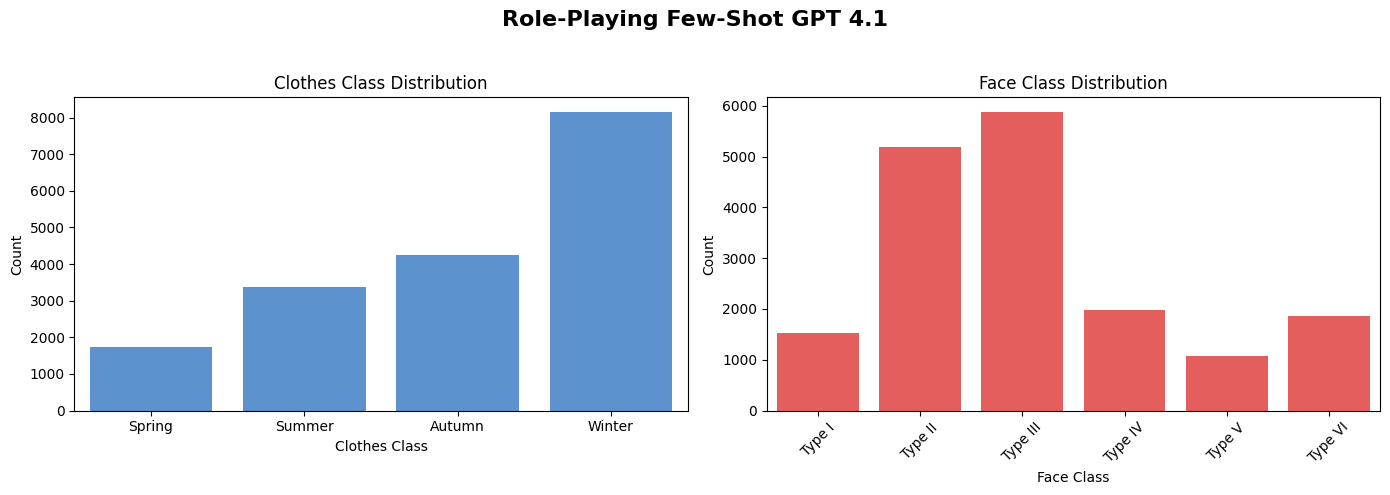

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
# df = pd.read_csv("classification-result.csv")

# Define desired orders
clothes_order = ['Spring', 'Summer', 'Autumn', 'Winter']
face_order = ['Type I', 'Type II', 'Type III', 'Type IV', 'Type V', 'Type VI']

# Convert to categorical
df['clothes_class'] = pd.Categorical(df['clothes_class'], categories=clothes_order, ordered=True)
df['face_class'] = pd.Categorical(df['face_class'], categories=face_order, ordered=True)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot Clothes Class with a single color
sns.countplot(data=df, x='clothes_class', order=clothes_order, color='#4A90E2', ax=axes[0])
axes[0].set_title("Clothes Class Distribution")
axes[0].set_xlabel("Clothes Class")
axes[0].set_ylabel("Count")

# Plot Face Class with a single color
sns.countplot(data=df, x='face_class', order=face_order, color='#FA4848', ax=axes[1])
axes[1].set_title("Face Class Distribution")
axes[1].set_xlabel("Face Class")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

# Add main title
plt.suptitle("Role-Playing Few-Shot GPT 4.1", fontsize=16, fontweight='bold')

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space at the top for suptitle

plt.show()


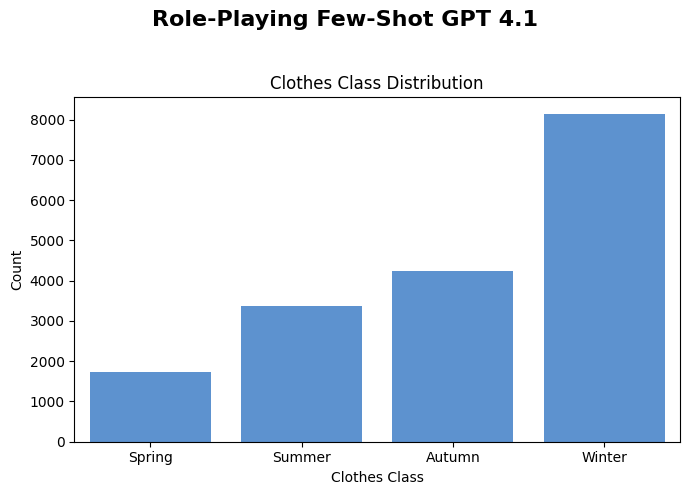

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
# df = pd.read_csv("classification-result.csv")

# Define desired orders
clothes_order = ['Spring', 'Summer', 'Autumn', 'Winter']
face_order = ['Type I', 'Type II', 'Type III', 'Type IV', 'Type V', 'Type VI']

# Convert to categorical
df['clothes_class'] = pd.Categorical(df['clothes_class'], categories=clothes_order, ordered=True)
df['face_class'] = pd.Categorical(df['face_class'], categories=face_order, ordered=True)

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

# Plot Clothes Class with a single color
sns.countplot(data=df, x='clothes_class', order=clothes_order, color='#4A90E2')
axes.set_title("Clothes Class Distribution")
axes.set_xlabel("Clothes Class")
axes.set_ylabel("Count")

# Plot Face Class with a single color
# sns.countplot(data=df, x='face_class', order=face_order, color='#FA4848')
# axes.set_title("Face Class Distribution")
# axes.set_xlabel("Face Class")
# axes.set_ylabel("Count")
# axes.tick_params(axis='x', rotation=45)

# Add main title
plt.suptitle("Role-Playing Few-Shot GPT 4.1", fontsize=16, fontweight='bold')

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space at the top for suptitle

plt.show()


In [4]:
df['clothes_class'].value_counts()

clothes_class
Winter    8146
Autumn    4252
Summer    3383
Spring    1727
Name: count, dtype: int64

In [5]:
df['face_class'].value_counts()

face_class
Type III    5873
Type II     5184
Type IV     1989
Type VI     1855
Type I      1524
Type V      1083
Name: count, dtype: int64

# Pemetaan Matriks

In [6]:
# Create co-occurrence matrix
co_matrix = pd.crosstab(df['clothes_class'], df['face_class'])

# Display matrix
print(co_matrix)

face_class     Type I  Type II  Type III  Type IV  Type V  Type VI
clothes_class                                                     
Spring             99      548       669      176     101      134
Summer            209      897      1255      441     211      370
Autumn            227     1125      1598      633     253      416
Winter            989     2614      2351      739     518      935


In [7]:
# co_matrix.to_csv('comatrix.csv')

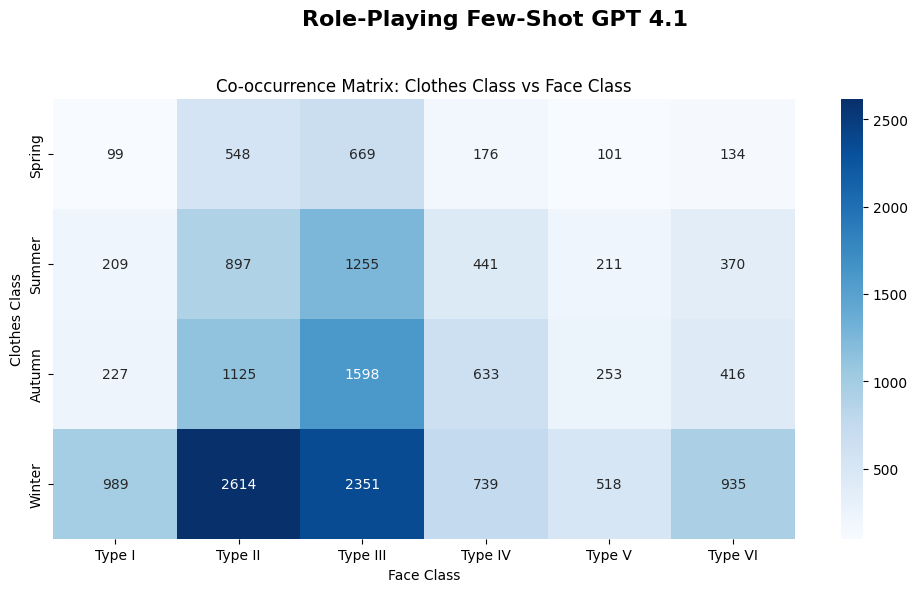

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(co_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Co-occurrence Matrix: Clothes Class vs Face Class")
plt.xlabel("Face Class")
plt.ylabel("Clothes Class")

# Add main title
plt.suptitle("Role-Playing Few-Shot GPT 4.1", fontsize=16, fontweight='bold')

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space at the top for suptitle

plt.show()

In [9]:
# # Normalize by row: divide each row by its sum
# normalized = co_matrix.div(co_matrix.sum(axis=1), axis=0)

# # Print normalized table
# print(normalized)


🔵 U matrix (user latent factors):
            latent_1  latent_2  latent_3  latent_4
face_class                                        
Type I        -0.146     0.554    -0.333     0.031
Type II       -0.589     0.547     0.357    -0.318
Type III      -0.721    -0.515     0.162     0.311
Type IV       -0.238    -0.309    -0.597    -0.699
Type V        -0.123     0.056    -0.122     0.138
Type VI       -0.201     0.173    -0.604     0.542

🔶 Sigma (singular values):
          latent_1  latent_2  latent_3  latent_4
latent_1      0.99     0.000      0.00     0.000
latent_2      0.00     0.105      0.00     0.000
latent_3      0.00     0.000      0.05     0.000
latent_4      0.00     0.000      0.00     0.013

🟣 V^T matrix (item latent factors):
clothes_class  Spring  Summer  Autumn  Winter
latent_1       -0.527  -0.498  -0.502  -0.472
latent_2       -0.086  -0.284  -0.430   0.853
latent_3        0.846  -0.345  -0.352  -0.206
latent_4        0.006   0.743  -0.663  -0.086


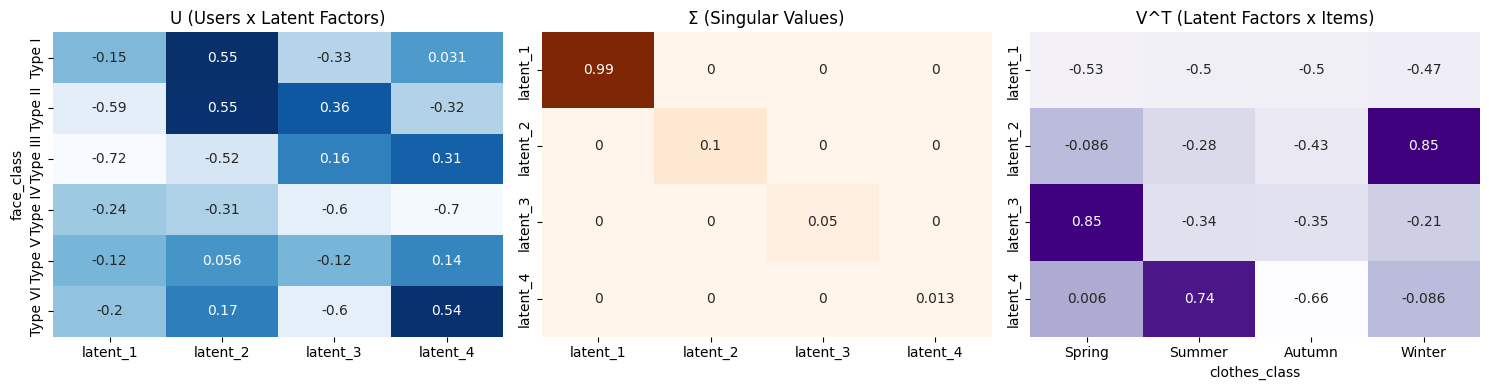


📈 Reconstructed Matrix (Predicted Scores):
clothes_class    Spring    Summer    Autumn    Winter
face_class                                           
Type I         0.057325  0.061779  0.053387  0.121409
Type II        0.317313  0.265149  0.264581  0.320894
Type III       0.387377  0.370973  0.375823  0.288608
Type IV        0.101911  0.130358  0.148871  0.090719
Type V         0.058483  0.062371  0.059501  0.063589
Type VI        0.077591  0.109370  0.097836  0.114780


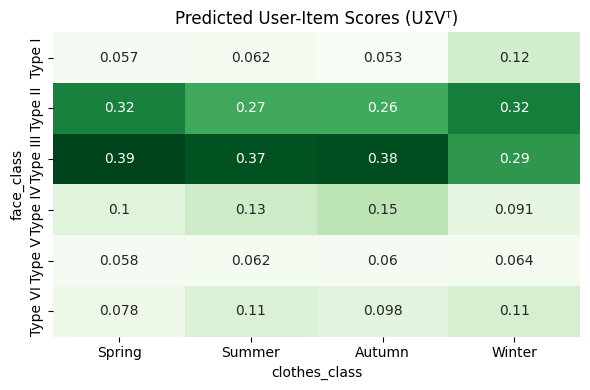

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# # ==== Step 1: Load and transpose data ====
# Transpose: users as rows, items as columns
normalized = co_matrix.div(co_matrix.sum(axis=1), axis=0)
user_item_matrix = normalized.T

# ==== Step 2: Perform SVD ====
U, s, VT = np.linalg.svd(user_item_matrix, full_matrices=False)
Sigma = np.diag(s)

# ==== Step 3: Wrap into DataFrames ====
U_df = pd.DataFrame(U, index=user_item_matrix.index, columns=[f"latent_{i+1}" for i in range(U.shape[1])])
Sigma_df = pd.DataFrame(Sigma, columns=[f"latent_{i+1}" for i in range(Sigma.shape[1])], index=[f"latent_{i+1}" for i in range(Sigma.shape[0])])
VT_df = pd.DataFrame(VT, columns=user_item_matrix.columns, index=[f"latent_{i+1}" for i in range(VT.shape[0])])

# ==== Step 4: Display values ====
print("\n🔵 U matrix (user latent factors):")
print(U_df.round(3))

print("\n🔶 Sigma (singular values):")
print(Sigma_df.round(3))

print("\n🟣 V^T matrix (item latent factors):")
print(VT_df.round(3))

# ==== Step 5: Visualize with heatmaps ====
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.heatmap(U_df, annot=True, cmap="Blues", cbar=False)
plt.title("U (Users x Latent Factors)")

plt.subplot(1, 3, 2)
sns.heatmap(Sigma_df, annot=True, cmap="Oranges", cbar=False)
plt.title("Σ (Singular Values)")

plt.subplot(1, 3, 3)
sns.heatmap(VT_df, annot=True, cmap="Purples", cbar=False)
plt.title("V^T (Latent Factors x Items)")

plt.tight_layout()
plt.show()

# ==== Step 6: Reconstruct predicted scores ====
predicted_matrix = np.dot(U, np.dot(Sigma, VT))
predicted_df = pd.DataFrame(predicted_matrix, index=user_item_matrix.index, columns=user_item_matrix.columns)

print("\n📈 Reconstructed Matrix (Predicted Scores):")
print(predicted_df)

# ==== Step 7: Visualize predicted scores ====
plt.figure(figsize=(6, 4))
sns.heatmap(predicted_df, annot=True, cmap="Greens", cbar=False)
plt.title("Predicted User-Item Scores (UΣVᵀ)")
plt.tight_layout()
plt.show()


In [11]:
# Now rank clothing classes per skin type
ranking_normalized = normalized.rank(ascending=False, method="min")
print("Rank clothing class per skin type:")
print(ranking_normalized)

# Optional: Get top matching clothing class for each skin type
top_clothes_class = normalized.idxmax(axis=0)
print("\nBest matched clothing class per skin type:")
print(top_clothes_class)

Rank clothing class per skin type:
face_class     Type I  Type II  Type III  Type IV  Type V  Type VI
clothes_class                                                     
Spring            3.0      2.0       1.0      3.0     4.0      4.0
Summer            2.0      3.0       3.0      2.0     2.0      2.0
Autumn            4.0      4.0       2.0      1.0     3.0      3.0
Winter            1.0      1.0       4.0      4.0     1.0      1.0

Best matched clothing class per skin type:
face_class
Type I      Winter
Type II     Winter
Type III    Spring
Type IV     Autumn
Type V      Winter
Type VI     Winter
dtype: category
Categories (4, object): ['Spring' < 'Summer' < 'Autumn' < 'Winter']


In [12]:
# Create a DataFrame where each row is a skin type and columns are the ranked clothes classes
recommendation_table = normalized.T.apply(
    lambda col: pd.Series(col.sort_values(ascending=False).index.tolist()),
    axis=1
)

# Rename columns for clarity
recommendation_table.columns = ['1st', '2nd', '3rd', '4th']
recommendation_table.index.name = 'skin_type'

# Display the table
recommendation_table


,1st,2nd,3rd,4th
skin_type,,,,
Type I,Winter,Summer,Spring,Autumn
Type II,Winter,Spring,Summer,Autumn
Type III,Spring,Autumn,Summer,Winter
Type IV,Autumn,Summer,Spring,Winter
Type V,Winter,Summer,Autumn,Spring
Type VI,Winter,Summer,Autumn,Spring


In [13]:
# recommendation_table.to_csv("clothes_recommendation_table.csv")

# HR@K

In [14]:
import pandas as pd

# Load expert data
# expert_df = pd.read_csv("eval-per-type/eval-type-5.csv")
# expert_df = pd.read_csv("expert-eval-per-type.csv")
expert_df = pd.read_csv("Eval-Data/eval-voting.csv")
# expert_df = pd.read_csv("expert-eval.csv")

# Assuming you already have recommendation_table from previous steps:
# Each row: skin_type, columns: ['1st', '2nd', '3rd', '4th']
# e.g., recommendation_table.loc['Type III'] → ['Summer', 'Spring', 'Autumn', 'Winter']

def compute_top_k_accuracy(expert_df, recommendation_table, k=1):
    correct = 0
    total = len(expert_df)
    
    for _, row in expert_df.iterrows():
        skin_type = row['skin_type']
        true_label = row['expert_recommendation']
        
        if skin_type not in recommendation_table.index:
            continue  # skip if skin_type is not in recommendation
        
        top_k_preds = recommendation_table.loc[skin_type].values[:k]
        
        if true_label in top_k_preds:
            correct += 1
    
    return correct / total if total > 0 else 0

for k in range(1, 5):
    acc = compute_top_k_accuracy(expert_df, recommendation_table, k=k)
    print(f"Top-{k} Accuracy: {acc:.2%}")


Top-1 Accuracy: 66.67%
Top-2 Accuracy: 75.00%
Top-3 Accuracy: 91.67%
Top-4 Accuracy: 100.00%


# NDCG@K

In [15]:
import numpy as np

def dcg(relevance, k):
    relevance = np.asarray(relevance[:k], dtype=float)
    return np.sum((2**relevance - 1) / np.log2(np.arange(2, relevance.size + 2)))

def ndcg(pred, ideal, k):
    ideal_dcg = dcg(ideal, k)
    return dcg(pred, k) / ideal_dcg if ideal_dcg != 0 else 0

def get_relevance_scores(real_ranking):
    """
    Assigns descending relevance scores: highest for top-ranked.
    e.g., rank 1 → 3, rank 2 → 2, etc.
    """
    return {item: len(real_ranking) - i - 1 for i, item in enumerate(real_ranking)}

def compute_ndcg_for_tests(tests, max_k=4):
    ndcg_at_k = {k: [] for k in range(1, max_k + 1)}

    for i, test in enumerate(tests):
        predicted = test["predicted"]
        real = test["real"]

        # Create relevance map from real ranking
        rel_map = get_relevance_scores(real)

        # Get relevance values
        predicted_relevance = [rel_map[item] for item in predicted]
        ideal_relevance = sorted(rel_map.values(), reverse=True)

        print(f"\n--- Test {i+1} ---")
        for k in range(1, max_k + 1):
            score = ndcg(predicted_relevance, ideal_relevance, k)
            ndcg_at_k[k].append(score)
            print(f"NDCG@{k}: {score:.4f}")

    print("\n=== Average NDCG@k ===")
    for k in range(1, max_k + 1):
        avg_score = np.mean(ndcg_at_k[k])
        print(f"Avg NDCG@{k}: {avg_score:.4f}")

# === Your test cases ===
tests = [
    {
        "predicted": ["Winter", "Summer", "Spring", "Autumn"],
        "real":      ["Winter", "Spring", "Summer", "Autumn"]
    },
    {
        "predicted": ["Winter", "Spring", "Summer", "Autumn"],
        "real":      ["Summer", "Autumn", "Spring", "Winter"]
    },
    {
        "predicted": ["Spring", "Autumn", "Summer", "Winter"],
        "real":      ["Spring", "Winter", "Summer", "Autumn"]
    },
    {
        "predicted": ["Autumn", "Summer", "Spring", "Winter"],
        "real":      ["Autumn", "Spring", "Summer", "Winter"]
    },
    {
        "predicted": ["Winter", "Summer", "Autumn", "Spring"],
        "real":      ["Winter", "Autumn", "Spring", "Summer"]
    },
    {
        "predicted": ["Winter", "Summer", "Autumn", "Spring"],
        "real":      ["Winter", "Autumn", "Summer", "Spring"]
    },
]

compute_ndcg_for_tests(tests, max_k=4)



--- Test 1 ---
NDCG@1: 1.0000
NDCG@2: 0.8581
NDCG@3: 0.9721
NDCG@4: 0.9721

--- Test 2 ---
NDCG@1: 0.0000
NDCG@2: 0.0709
NDCG@3: 0.4398
NDCG@4: 0.5774

--- Test 3 ---
NDCG@1: 1.0000
NDCG@2: 0.7872
NDCG@3: 0.7985
NDCG@4: 0.9360

--- Test 4 ---
NDCG@1: 1.0000
NDCG@2: 0.8581
NDCG@3: 0.9721
NDCG@4: 0.9721

--- Test 5 ---
NDCG@1: 1.0000
NDCG@2: 0.7872
NDCG@3: 0.9049
NDCG@4: 0.9508

--- Test 6 ---
NDCG@1: 1.0000
NDCG@2: 0.8581
NDCG@3: 0.9721
NDCG@4: 0.9721

=== Average NDCG@k ===
Avg NDCG@1: 0.8333
Avg NDCG@2: 0.7033
Avg NDCG@3: 0.8433
Avg NDCG@4: 0.8968
